In [1]:
import pandas as pd
import numpy as np

## Read Displacement Files

In [2]:
dipl = pd.read_csv(r'F:\wave_obs\tweed_2487\tweed_2487\2020\05\tweed_2487{disp}2020-05-01.csv', sep = '\t', header = None)
dipl.columns = ['timestamp','status','h','n','w']

In [3]:
dipl.index = pd.to_datetime(dipl.timestamp, unit = 's')
dipl.index.name = 'datetime'

In [4]:
dipl.head()

,timestamp,status,h,n,w
datetime,,,,,
2020-04-30 23:44:52.250232935,1.588290e+09,0,-0.549495,-0.331852,0.037040
2020-04-30 23:44:52.640857935,1.588290e+09,0,-0.393114,-0.239833,-0.069262
2020-04-30 23:44:53.031482934,1.588290e+09,0,-0.354360,-0.106953,-0.235325
2020-04-30 23:44:53.422107935,1.588290e+09,0,-0.398405,-0.002000,-0.368384
2020-04-30 23:44:53.812732935,1.588290e+09,0,-0.336808,0.111065,-0.447451


## Read 1d HeaveSpectrum File (f20)

In [5]:
low = []
start = 0.025
low.append(start)
for i in range(45):
    start+=0.005
    low.append(np.round(start,3))
mid = []
start = 0.26
mid.append(start)
for i in range((78-46)):
    start+=0.01
    mid.append(np.round(start,3))
high = []
start = 0.6
high.append(start)
for i in range((100-80)):
    start+=0.02
    high.append(np.round(start,3))
    
all1dfreq = low+mid+high

In [6]:
spectrum = pd.read_csv(r'F:\wave_obs\tweed_2487\tweed_2487\2020\05\tweed_2487{0xF20}2020-05.csv', sep = '\t', header = None)

In [7]:
spectrum.columns = ['timestamp','datestamp','segments']+all1dfreq

In [8]:
spectrum.index = pd.to_datetime(spectrum.timestamp, unit = 's')
spectrum.index.name = 'datetime'

<AxesSubplot:>

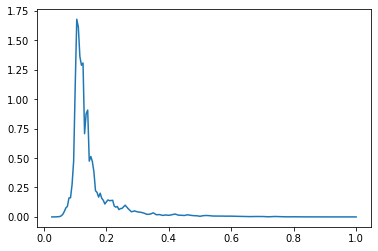

In [9]:
spectrum.iloc[0][3:].T.plot()

## Read Primary Directional Spectrum Message

In [29]:
Primdirspec = pd.read_csv(r'F:\wave_obs\tweed_2487\tweed_2487\2020\05\tweed_2487{0xF21}2020-05.csv', sep = '\t', header = None)

In [40]:
spreadNames = ['spr'+str(i) for i in range(100)]
dirNames = ['dir'+str(i) for i in range(100)]

In [31]:
dirs = []
d = 0
for i in range(100):
    dirs.append(np.round(d,2))
    d+=3.6

In [32]:
Primdirspec.columns = ['timestamp','daystamp','segments']+dirs+spreadNames

In [38]:
np.rad2deg(Primdirspec.iloc[0,3:102])

0.0       17.934066
3.6      214.769231
7.2      142.417582
10.8     159.296703
14.4     174.153846
            ...    
338.4    252.483516
342.0    248.527473
345.6    173.098901
349.2    349.802198
352.8    270.505495
Name: 0, Length: 99, dtype: float64

## Read Secondary Directional Spectrum Message